In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import json
pd.set_option('display.max_columns', None)

In [ ]:
!ls "/content/drive/My Drive/Social_Media"

answerer.csv	 bert_valid.csv  top_tags.csv	  users_ask.csv
answerer_id.csv  questions.csv	 train_data.json  users.csv
bert_test.csv	 test_data.json  train.json	  valid_data.json
bert_train.csv	 test.json	 users_ans.csv	  valid.json


In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/Social_Media/answer.csv')
# df2 = pd.read_csv('/content/drive/My Drive/Social_Media/answerer.csv', encoding="ISO-8859-1")
# df3 = pd.read_csv('/content/drive/My Drive/Social_Media/answerer_id.csv')
df4 = pd.read_csv("/content/drive/My Drive/Social_Media/questions.csv", delimiter="\t")

In [ ]:
# df5 = pd.read_csv('/content/drive/My Drive/Social_Media/top_tags.csv')
users_ans = pd.read_csv('/content/drive/My Drive/Social_Media/users_ans.csv')
# df7 = pd.read_csv('/content/drive/My Drive/Social_Media/users_ask.csv')
# df8 = pd.read_csv('/content/drive/My Drive/Social_Media/users.csv')

In [ ]:
answer_columns=['answer_id','is_accepted','question_id','answerer_id','answer_body','answerer_reputation','answerer_accept_rate','answer_code_size','answer_age', 'answer_score_sum', 'number_of_answer',
       'answer_score_ratio', 'answer_position', 'answer_relative_position',
       'answer_external_link', 'answer_size', 'answer_GF', 'answer_FK','common',
       'answer_upper_count', 'answer_upper', 'answer_polarity',
       'answer_subjectivity','cosine_similarity']
ans=df1[answer_columns]
ans = pd.merge(ans, users_ans, left_on='answerer_id', right_on='user_id', how='left')
ans

,answer_id,is_accepted,question_id,answerer_id,answer_body,answerer_reputation,answerer_accept_rate,answer_code_size,answer_age,answer_score_sum,number_of_answer,answer_score_ratio,answer_position,answer_relative_position,answer_external_link,answer_size,answer_GF,answer_FK,common,answer_upper_count,answer_upper,answer_polarity,answer_subjectivity,cosine_similarity,user_id,all_badge,gold_badge,silver_badge,bronze_badge,vote,answer_count,question_count,reputation_change_year
0,71973577,False,65530874,12771945.0,"You can't using this for free, for me, after s...",180.0,NaN,4,41140504.0,8,3,0.000000,2.0,0.333333,0,31,7.49,4.6,0.5,2,0.064516,0.250000,0.591667,0.128891,12771945.0,12.0,0.0,2.0,10.0,128.0,12.0,10.0,57.0
1,71541246,False,65527354,15213503.0,There are other way to solve this problem. Fir...,54.0,NaN,149,38239835.0,25,5,0.040000,5.0,0.000000,0,63,6.77,5.6,0.0,11,0.174603,-0.075000,0.561667,0.219841,15213503.0,3.0,0.0,0.0,3.0,6.0,11.0,0.0,33.0
2,71324808,False,65534042,1884171.0,2022/03/02 answers\nNative M1 installations ar...,3712.0,67.0,10,36694820.0,58,5,0.034483,4.0,0.200000,3,152,11.50,13.4,0.0,51,0.335526,0.129259,0.425794,0.308493,1884171.0,61.0,1.0,23.0,37.0,509.0,67.0,16.0,100.0
3,70950886,False,65530874,14805178.0,This is my case.Package: https://pub.dev/packa...,33.0,NaN,0,34265758.0,8,3,0.000000,2.0,0.333333,4,15,20.19,42.5,0.0,6,0.400000,0.000000,0.000000,0.260293,14805178.0,2.0,0.0,0.0,2.0,0.0,4.0,3.0,20.0
4,70794888,False,65533684,4642485.0,Upgrading to a newer version of PyCharm/Intell...,7691.0,73.0,46,33188693.0,9,3,0.111111,2.0,0.333333,0,110,12.34,11.7,0.0,8,0.072727,0.050505,0.131313,0.303030,4642485.0,80.0,4.0,29.0,47.0,8689.0,224.0,17.0,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162407,70528771,False,70528489,80911.0,You can get the latest inserted item in multip...,83008.0,82.0,18,2004.0,1,3,1.000000,1.0,0.666667,0,13,17.51,9.5,0.0,1,0.076923,0.250000,0.450000,0.287032,80911.0,291.0,18.0,104.0,169.0,613.0,2075.0,109.0,3068.0
162408,70528744,False,70528463,1410664.0,Look here: https://docs.microsoft.com/pl-pl/do...,68339.0,52.0,25,2000.0,4,3,0.500000,1.0,0.666667,1,22,13.49,17.0,1.0,4,0.181818,0.000000,0.000000,0.196654,1410664.0,121.0,5.0,44.0,72.0,205.0,4194.0,90.0,7373.0
162409,70528556,False,70528489,5193536.0,Try adding the index number in your views:And ...,31524.0,NaN,65,517.0,1,3,0.000000,2.0,0.333333,0,15,6.00,5.6,0.0,2,0.133333,0.000000,0.000000,0.567369,5193536.0,70.0,6.0,24.0,40.0,-2724.0,2268.0,2.0,3454.0
162410,70528665,False,70528463,1863229.0,Assuming is meant to be you could use:,446967.0,58.0,14,1495.0,4,3,0.250000,2.0,0.333333,0,8,8.20,2.9,0.0,1,0.125000,0.000000,0.000000,0.253917,1863229.0,576.0,24.0,237.0,315.0,11057.0,19845.0,77.0,24147.0


In [ ]:
question_columns=['question_id','question_title','question_body','question_tags','question_code_size']
question=df4[question_columns]
question

,question_id,question_title,question_body,question_tags,question_code_size
0,69159038,how to I get a user&#39;s IP address when sepa...,"I have two apps, one front end (react.js) and ...","['node.js', 'reactjs', 'express', 'nestjs']",0
1,69153798,countDocuments() is not working in api call,I am trying to get a count of products using a...,"['javascript', 'node.js', 'postman']",57
2,69158646,How to re-render a heavy React component with ...,"With some parameters, I have a React component...",['reactjs'],0
3,69159319,Why does TypeScript interpret filtered string ...,I've got the following expressionTypeScript do...,['typescript'],5
4,69158842,Why is my console.log() not logging anything i...,I have a SSR page build on Nuxt (Vue). There i...,"['vue.js', 'debugging', 'vuejs2', 'console', '...",17
...,...,...,...,...,...
47649,70532961,Comparison of two Character Arrays in C++ usin...,How does the comparison operator work when doi...,"['c++', 'arrays', 'if-statement', 'comparison'...",79
47650,70533895,Convert Dataframe into (first panel of) 3D array,I have the following Dataframe named :AB051011...,"['python', 'arrays', 'pandas', 'dataframe', 'n...",7
47651,70533326,How to implement an interface that contains an...,I have two interface:Now I want to implement t...,"['c#', 'interface']",84
47652,70532996,Make each tab section unique instead of trigge...,"I am having a select box that works as tabs, i...",['javascript'],51


In [ ]:
del df1
del df4
del users_ans

### BERT

In [ ]:
!pip install transformers

In [ ]:
question['question_id'] = question['question_id'].astype('int64')
que_train, que_valid = train_test_split(question, test_size=0.2, random_state=21)
que_valid, que_test = train_test_split(que_valid, test_size=0.5, random_state=21)
que_train.reset_index(drop=True, inplace=True)
que_valid.reset_index(drop=True, inplace=True)
que_test.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ans['is_accepted'] = ans['is_accepted'].apply(lambda x: 1 if x == True else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data={}
data['train'] = pd.merge(ans, que_train, on='question_id')[['answer_body','question_id','question_body','question_code_size','is_accepted','answerer_reputation','answerer_accept_rate','answer_code_size','answer_external_link','answer_size','answer_GF','answer_FK']]
data['valid'] = pd.merge(ans, que_valid, on='question_id')[['answer_body','question_id','question_body','question_code_size','is_accepted','answerer_reputation','answerer_accept_rate','answer_code_size','answer_external_link','answer_size','answer_GF','answer_FK']]
data['test'] = pd.merge(ans, que_test, on='question_id')[['answer_body','question_id','question_body','question_code_size','is_accepted','answerer_reputation','answerer_accept_rate','answer_code_size','answer_external_link','answer_size','answer_GF','answer_FK']]

In [ ]:
data['train']=data['train'].fillna(0)
data['valid']=data['valid'].fillna(0)
data['test']=data['test'].fillna(0)

In [ ]:
# 6min
que_train['label'] = 0
for i in range(que_train.shape[0]):
  tmp = ans[ans['question_id']==que_train.loc[i,'question_id']]
  tmp.reset_index(drop=True, inplace=True)
  for j in range(tmp.shape[0]):
    if tmp.loc[j,'is_accepted'] == 1:
      que_train.loc[i,'label'] = j 
    que_train.loc[i,'ans'+str(j)] = tmp.loc[j,'answer_body']
que_train=que_train.fillna("")

In [ ]:
que_valid['label'] = 0
for i in range(que_valid.shape[0]):
  tmp = ans[ans['question_id']==que_valid.loc[i,'question_id']]
  tmp.reset_index(drop=True, inplace=True)
  for j in range(tmp.shape[0]):
    if tmp.loc[j,'is_accepted'] == 1:
      que_valid.loc[i,'label'] = j 
    que_valid.loc[i,'ans'+str(j)] = tmp.loc[j,'answer_body']
que_valid=que_valid.fillna("")

In [ ]:
que_test['label'] = 0
for i in range(que_test.shape[0]):
  tmp = ans[ans['question_id']==que_test.loc[i,'question_id']]
  tmp.reset_index(drop=True, inplace=True)
  for j in range(tmp.shape[0]):
    if tmp.loc[j,'is_accepted'] == 1:
      que_test.loc[i,'label'] = j 
    que_test.loc[i,'ans'+str(j)] = tmp.loc[j,'answer_body']
que_test=que_test.fillna("")

In [ ]:
que_train = que_train.drop(columns=['question_title','question_tags','question_code_size'])
que_valid = que_valid.drop(columns=['question_title','question_tags','question_code_size'])
que_test = que_test.drop(columns=['question_title','question_tags','question_code_size'])

In [ ]:
### 刪除 58 筆資料，保留最多 11 個答案的題目
que_train=que_train[que_train['ans11']==""]
que_valid=que_valid[que_valid['ans11']==""]
que_test=que_test[que_test['ans11']==""]

In [ ]:
que_col=['question_id', 'question_body', 'label', 'ans0', 'ans1', 'ans2', 'ans3', 'ans4','ans5', 'ans6', 'ans7', 'ans8', 'ans9', 'ans10']
que_train=que_train[que_col]
que_valid=que_valid[que_col]
que_test=que_test[que_col]

In [ ]:
que_train.to_csv("/content/drive/My Drive/Social_Media/bert_train.csv", index=False)
que_valid.to_csv("/content/drive/My Drive/Social_Media/bert_valid.csv", index=False)
que_test.to_csv("/content/drive/My Drive/Social_Media/bert_test.csv", index=False)

In [ ]:
que_train=pd.read_csv("/content/drive/My Drive/Social_Media/bert_train.csv")
que_valid=pd.read_csv("/content/drive/My Drive/Social_Media/bert_valid.csv")
que_test=pd.read_csv("/content/drive/My Drive/Social_Media/bert_test.csv")
que_train=que_train.fillna("")
que_valid=que_valid.fillna("")
que_test=que_test.fillna("")

In [ ]:
train_json=que_train.to_json('/content/drive/My Drive/Social_Media/train.json', orient = 'records')
valid_json=que_valid.to_json('/content/drive/My Drive/Social_Media/valid.json', orient = 'records')
test_json=que_test.to_json('/content/drive/My Drive/Social_Media/test.json', orient = 'records')

In [ ]:
with open('/content/drive/My Drive/Social_Media/train.json', 'r') as f:
    train = json.load(f)
with open('/content/drive/My Drive/Social_Media/valid.json', 'r') as f:
    valid = json.load(f)
with open('/content/drive/My Drive/Social_Media/test.json', 'r') as f:
    test = json.load(f)

In [ ]:
from transformers import AutoTokenizer
model_checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

In [ ]:
ans_names = ['ans0', 'ans1', 'ans2', 'ans3', 'ans4', 'ans5', 'ans6', 'ans7', 'ans8', 'ans9', 'ans10']

def preprocess_function(examples):
    # Repeat each first sentence four times to go with the four possibilities of second sentences.
    first_sentences = [[examples[i]["question_body"]] * 11 for i in range(len(examples))] 
    # Grab all second sentences possible for each context.
    second_sentences = [[examples[i][ans_id] for ans_id in ans_names] for i in range(len(examples))]
    
    # Flatten everything
    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])
    
    # Tokenize
    tokenized_examples = tokenizer(first_sentences, second_sentences, truncation=True)
    for k, v in tokenized_examples.items():
      print(k,v)
    # Un-flatten
    return {k: [v[i:i+11] for i in range(0, len(v), 11)] for k, v in tokenized_examples.items()}

In [ ]:
examples = train[:2]
features = preprocess_function(examples)
print(len(features["input_ids"]), len(features["input_ids"][0]), [len(x) for x in features["input_ids"][0]])

input_ids [[101, 1999, 2026, 3642, 1010, 1045, 2572, 2667, 2000, 25732, 1996, 5310, 2000, 7953, 2037, 2171, 1010, 2591, 3036, 2193, 1010, 5310, 3593, 1010, 1998, 20786, 1010, 2096, 6434, 3436, 1996, 2591, 3036, 2193, 1999, 4289, 1010, 7687, 6419, 2035, 3616, 2000, 1010, 1998, 1996, 3494, 1999, 2037, 20786, 2000, 2004, 2092, 1012, 2295, 1010, 1045, 1005, 1049, 8949, 5881, 2006, 1996, 3988, 2591, 3036, 4664, 1010, 2004, 2096, 1045, 2572, 5604, 2009, 1010, 1996, 3642, 4012, 22090, 2015, 1010, 2021, 2009, 28790, 1012, 1045, 2228, 2026, 3291, 2003, 2008, 1045, 2572, 11587, 2007, 1996, 7077, 2075, 1012, 2323, 1045, 2022, 2437, 1037, 3853, 2005, 2023, 2000, 7077, 1010, 2030, 2003, 2023, 2074, 4498, 3308, 1029, 2064, 2619, 4863, 1996, 3853, 2000, 2033, 1010, 2004, 2092, 2004, 1996, 3853, 1029, 1045, 2131, 1996, 10147, 3367, 1997, 2009, 1010, 2021, 5128, 2009, 2046, 3218, 2003, 2073, 1045, 2514, 2066, 1045, 2572, 7989, 28616, 6906, 6321, 999, 2182, 2003, 2054, 1045, 2031, 2061, 2521, 1024, 102,

In [ ]:
idx = 0
[tokenizer.decode(features["input_ids"][idx][i]) for i in range(11)]

["[CLS] in my code, i am trying to prompt the user to input their name, social security number, userid, and password, while outputting the social security number in format, essentially replacing all numbers to, and the characters in their password to as well. though, i'm severely stuck on the initial social security portion, as while i am testing it, the code compiles, but it terminates. i think my problem is that i am troubled with the looping. should i be making a function for this to loop, or is this just entirely wrong? can someone explain the function to me, as well as the function? i get the jist of it, but putting it into practice is where i feel like i am failing miserably! here is what i have so far : [SEP] okay : ] so yall, i got this to output in a very meaningful way all thanks to your contributions and some reading on my end. i also went to the cppreference site to read more. so thank you for that! this is my new and improved code.. please let me know what yall think... [S

In [ ]:
train_features = preprocess_function(train)
print(len(train_features["input_ids"]), len(train_features["input_ids"][0]), [len(x) for x in train_features["input_ids"][0]])

valid_features = preprocess_function(valid)
print(len(valid_features["input_ids"]), len(valid_features["input_ids"][0]), [len(x) for x in valid_features["input_ids"][0]])

test_features = preprocess_function(test)
print(len(test_features["input_ids"]), len(test_features["input_ids"][0]), [len(x) for x in test_features["input_ids"][0]])

38077 11 [233, 512, 250, 165, 165, 165, 165, 165, 165, 165, 165]


In [ ]:
for i in range(len(train)):
  train[i]['input_ids'] = train_features['input_ids'][i]
for i in range(len(valid)):
  valid[i]['input_ids'] = valid_features['input_ids'][i]
for i in range(len(test)):
  test[i]['input_ids'] = test_features['input_ids'][i]

In [ ]:
with open('/content/drive/My Drive/Social_Media/train_data.json', 'w') as f:
  json.dump(train, f)
with open('/content/drive/My Drive/Social_Media/valid_data.json', 'w') as f:
  json.dump(valid, f)
with open('/content/drive/My Drive/Social_Media/test_data.json', 'w') as f:
  json.dump(test, f)

In [ ]:
with open('/content/drive/My Drive/Social_Media/train_data.json', 'r') as f:
    train = json.load(f)
with open('/content/drive/My Drive/Social_Media/valid_data.json', 'r') as f:
    valid = json.load(f)
with open('/content/drive/My Drive/Social_Media/test_data.json', 'r') as f:
    test = json.load(f)

In [ ]:
batch_size = 1

In [ ]:
from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer
model = AutoModelForMultipleChoice.from_pretrained(model_checkpoint)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMultipleChoice: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMultipleChoice from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMultipleChoice were not initialized from the model checkpoint at bert-base-uncased and are newly

In [ ]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-swag",
    evaluation_strategy = "epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=2,
    weight_decay=0.01,
    gradient_accumulation_steps=16,
    eval_accumulation_steps=16,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
from dataclasses import dataclass
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy
from typing import Optional, Union
import torch

@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad the inputs for multiple choice received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()} for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])
        
        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        
        # Un-flatten
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

In [ ]:
import numpy as np

def compute_metrics(eval_predictions):
    predictions, label_ids = eval_predictions
    preds = np.argmax(predictions, axis=1)
    return {"accuracy": (preds == label_ids).astype(np.float32).mean().item()}

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=train,
    eval_dataset=valid,
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 38077
  Num Epochs = 2
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 16
  Total optimization steps = 4758
The following columns in the training set don't have a corresponding argument in `BertForMultipleChoice.forward` and have been ignored: question_id, ans0, ans10, ans4, ans7, question_body, ans2, ans9, ans3, ans1, ans8, ans5, ans6. If question_id, ans0, ans10, ans4, ans7, question_body, ans2, ans9, ans3, ans1, ans8, ans5, ans6 are not expected by `BertForMultipleChoice.forward`,  you can safely ignore this message.


Epoch,Training Loss,Validation Loss,Accuracy
0,1.238300,1.215461,0.447667
1,1.158400,1.194580,0.448928


Saving model checkpoint to bert-base-uncased-finetuned-swag/checkpoint-500
Configuration saved in bert-base-uncased-finetuned-swag/checkpoint-500/config.json
Model weights saved in bert-base-uncased-finetuned-swag/checkpoint-500/pytorch_model.bin
tokenizer config file saved in bert-base-uncased-finetuned-swag/checkpoint-500/tokenizer_config.json
Special tokens file saved in bert-base-uncased-finetuned-swag/checkpoint-500/special_tokens_map.json
Saving model checkpoint to bert-base-uncased-finetuned-swag/checkpoint-1000
Configuration saved in bert-base-uncased-finetuned-swag/checkpoint-1000/config.json
Model weights saved in bert-base-uncased-finetuned-swag/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in bert-base-uncased-finetuned-swag/checkpoint-1000/tokenizer_config.json
Special tokens file saved in bert-base-uncased-finetuned-swag/checkpoint-1000/special_tokens_map.json
Saving model checkpoint to bert-base-uncased-finetuned-swag/checkpoint-1500
Configuration saved i

TrainOutput(global_step=4758, training_loss=1.216743215887223, metrics={'train_runtime': 34172.4734, 'train_samples_per_second': 2.229, 'train_steps_per_second': 0.139, 'total_flos': 9.70388858516789e+16, 'train_loss': 1.216743215887223, 'epoch': 2.0})

In [ ]:
predictions = trainer.predict(test)

***** Running Prediction *****
  Num examples = 4761
  Batch size = 1
The following columns in the test set don't have a corresponding argument in `BertForMultipleChoice.forward` and have been ignored: question_id, ans0, ans10, ans4, ans7, question_body, ans2, ans9, ans3, ans1, ans8, ans5, ans6. If question_id, ans0, ans10, ans4, ans7, question_body, ans2, ans9, ans3, ans1, ans8, ans5, ans6 are not expected by `BertForMultipleChoice.forward`,  you can safely ignore this message.


In [ ]:
print(predictions)

PredictionOutput(predictions=array([[ 0.4655485 ,  0.09364327,  0.6524337 , ..., -4.011312  ,
        -4.011312  , -4.011312  ],
       [ 1.0143447 , -0.08235786,  0.79357874, ..., -3.9643087 ,
        -3.9643087 , -3.9643087 ],
       [ 0.5762504 ,  1.0119383 ,  1.4203973 , ..., -3.9214609 ,
        -3.9214609 , -3.9214609 ],
       ...,
       [ 1.8334532 ,  2.1057029 ,  2.0092218 , ..., -3.9240768 ,
        -3.9240768 , -3.9240768 ],
       [ 0.9157229 ,  0.88085276,  0.9795244 , ..., -3.8866916 ,
        -3.8866916 , -3.8866916 ],
       [ 2.365618  ,  1.8296384 ,  2.1459022 , ..., -3.9658399 ,
        -3.9658399 , -3.9658399 ]], dtype=float32), label_ids=array([0, 0, 2, ..., 2, 0, 0]), metrics={'test_loss': 1.198655128479004, 'test_accuracy': 0.4496954381465912, 'test_runtime': 775.3663, 'test_samples_per_second': 6.14, 'test_steps_per_second': 6.14})


### optimizer

In [ ]:
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import csv

from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from keras import models
from keras import layers
from keras import regularizers

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_stopwords(text):
    stopwords_list = stopwords.words('english')
    words = text.split() 
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 1] 
    return " ".join(clean_words) 

In [ ]:
def model_training(model, X_train, y_train, X_valid, y_valid, opt='rmsprop', epo=10):
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  
    history = model.fit(X_train, y_train, epochs=epo, batch_size=BATCH_SIZE, validation_data=(X_valid, y_valid), verbose=1)
    return history

In [ ]:
WORDS_NUMBER = 10000
BATCH_SIZE = 512

In [ ]:
question = question.dropna()
question['question_body'] = question['question_body'].astype(str).apply(remove_stopwords)
question['question_id'] = question['question_id'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
ans['is_accepted'] = ans['is_accepted'].apply(lambda x: 1 if x == True else 0)
ans['answer_body'] = ans['answer_body'].astype(str).apply(remove_stopwords)
ans = ans.dropna(subset=['answerer_id', 'user_id']).fillna(0)
ans.drop(columns=['user_id'], inplace=True)

In [ ]:
que_train, que_valid = train_test_split(question, test_size=0.2, random_state=21)
que_valid, que_test = train_test_split(que_valid, test_size=0.5, random_state=21)
que_train.reset_index(drop=True, inplace=True)
que_valid.reset_index(drop=True, inplace=True)
que_test.reset_index(drop=True, inplace=True)

In [ ]:
data={}
data['train'] = pd.merge(ans, que_train, on='question_id')#[['answer_body','question_id','question_body','question_code_size','is_accepted','answerer_reputation','answerer_accept_rate','answer_code_size','answer_external_link','answer_size','answer_GF','answer_FK']]
data['valid'] = pd.merge(ans, que_valid, on='question_id')#[['answer_body','question_id','question_body','question_code_size','is_accepted','answerer_reputation','answerer_accept_rate','answer_code_size','answer_external_link','answer_size','answer_GF','answer_FK']]
data['test'] = pd.merge(ans, que_test, on='question_id')#[['answer_body','question_id','question_body','question_code_size','is_accepted','answerer_reputation','answerer_accept_rate','answer_code_size','answer_external_link','answer_size','answer_GF','answer_FK']]

In [ ]:
X_train_ans = data['train']['answer_body']
X_valid_ans = data['valid']['answer_body']
X_test_ans = data['test']['answer_body']

X_train_que = data['train']['question_body']
X_valid_que = data['valid']['question_body']
X_test_que = data['test']['question_body']

y_train = data['train']['is_accepted']
y_valid = data['valid']['is_accepted']
y_test = data['test']['is_accepted']

In [ ]:
ans_tk = pd.concat([X_train_ans,X_valid_ans])
tk = Tokenizer(num_words=WORDS_NUMBER, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ")
tk.fit_on_texts(ans_tk)

X_train_seq_ans = tk.texts_to_sequences(X_train_ans)
X_valid_seq_ans = tk.texts_to_sequences(X_valid_ans)
X_test_seq_ans = tk.texts_to_sequences(X_test_ans)

In [ ]:
seq_lengths_ans = X_train_ans.apply(lambda x: len(x.split(' ')))
seq_lengths_ans.describe()

count    128560.000000
mean         26.149806
std          38.063515
min           1.000000
25%           7.000000
50%          16.000000
75%          31.000000
max        2270.000000
Name: answer_body, dtype: float64

In [ ]:
seq_lengths = X_valid_ans.apply(lambda x: len(x.split(' ')))
seq_lengths.describe()

count    16080.000000
mean        26.137935
std         39.765489
min          1.000000
25%          7.000000
50%         16.000000
75%         31.000000
max       1469.000000
Name: answer_body, dtype: float64

In [ ]:
que_tk = pd.concat([X_train_que,X_valid_que])
tk = Tokenizer(num_words=WORDS_NUMBER, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=" ")
tk.fit_on_texts(que_tk)

X_train_seq_que = tk.texts_to_sequences(X_train_que)
X_valid_seq_que = tk.texts_to_sequences(X_valid_que)
X_test_seq_que = tk.texts_to_sequences(X_test_que)

In [ ]:
seq_lengths_que = X_train_que.apply(lambda x: len(x.split(' ')))
seq_lengths_que.describe()

count    128560.000000
mean         41.165643
std          31.595505
min           1.000000
25%          22.000000
50%          33.000000
75%          50.000000
max         746.000000
Name: question_body, dtype: float64

In [ ]:
seq_lengths = X_valid_que.apply(lambda x: len(x.split(' ')))
seq_lengths.describe()

count    16080.000000
mean        41.405037
std         34.609753
min          1.000000
25%         22.000000
50%         34.000000
75%         50.000000
max       1134.000000
Name: question_body, dtype: float64

In [ ]:
MAX_LEN_ANS = int(seq_lengths_ans.describe()['max'])
MAX_LEN_QUE = int(seq_lengths_que.describe()['max'])
MAX_LEN = MAX_LEN_ANS+MAX_LEN_QUE

In [ ]:
X_train_seq_trunc_ans = pad_sequences(X_train_seq_ans, maxlen=MAX_LEN_ANS)
X_valid_seq_trunc_ans = pad_sequences(X_valid_seq_ans, maxlen=MAX_LEN_ANS)
X_test_seq_trunc_ans = pad_sequences(X_test_seq_ans, maxlen=MAX_LEN_ANS)
X_train_seq_trunc_que = pad_sequences(X_train_seq_que, maxlen=MAX_LEN_QUE)
X_valid_seq_trunc_que = pad_sequences(X_valid_seq_que, maxlen=MAX_LEN_QUE)
X_test_seq_trunc_que = pad_sequences(X_test_seq_que, maxlen=MAX_LEN_QUE)

In [ ]:
X_train_seq_trunc = np.concatenate((X_train_seq_trunc_que, X_train_seq_trunc_ans),axis=1)
X_valid_seq_trunc = np.concatenate((X_valid_seq_trunc_que, X_valid_seq_trunc_ans),axis=1)
X_test_seq_trunc = np.concatenate((X_test_seq_trunc_que, X_test_seq_trunc_ans),axis=1)

In [ ]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_train_oh = to_categorical(y_train_le)

In [ ]:
le = LabelEncoder()
y_valid_le = le.fit_transform(y_valid)
y_valid_oh = to_categorical(y_valid_le)

In [ ]:
answerer_col=['all_badge', 'gold_badge', 'silver_badge', 'bronze_badge', 'vote', 'answer_count', 'question_count', 'reputation_change_year','answerer_accept_rate','answerer_reputation']
ans_col=['answer_code_size', 'answer_age', 'answer_score_sum', 'number_of_answer', 'answer_score_ratio', 'answer_position', 'answer_relative_position', 'answer_external_link', 'answer_size', 'answer_GF', 'answer_FK', 'common', 'answer_upper_count', 'answer_upper', 'answer_polarity', 'answer_subjectivity','cosine_similarity']

純文字

In [ ]:
x_train=X_train_seq_trunc.copy()
x_valid=X_valid_seq_trunc.copy()
x_test=X_test_seq_trunc.copy()

純文字+ans

In [ ]:
x_train = np.concatenate((X_train_seq_trunc, data['train'][ans_col].to_numpy()), axis=1)
x_valid = np.concatenate((X_valid_seq_trunc, data['valid'][ans_col].to_numpy()), axis=1)
x_test = np.concatenate((X_test_seq_trunc, data['test'][ans_col].to_numpy()), axis=1)

純文字+answerer

In [ ]:
x_train = np.concatenate((X_train_seq_trunc, data['train'][answerer_col].to_numpy()), axis=1)
x_valid = np.concatenate((X_valid_seq_trunc, data['valid'][answerer_col].to_numpy()), axis=1)
x_test = np.concatenate((X_test_seq_trunc, data['test'][answerer_col].to_numpy()), axis=1)

純文字+ans+answerer

In [ ]:
x_train = np.concatenate((X_train_seq_trunc, data['train'][ans_col].to_numpy(), data['train'][answerer_col].to_numpy()), axis=1)
x_valid = np.concatenate((X_valid_seq_trunc, data['valid'][ans_col].to_numpy(), data['valid'][answerer_col].to_numpy()), axis=1)
x_test = np.concatenate((X_test_seq_trunc, data['test'][ans_col].to_numpy(), data['test'][answerer_col].to_numpy()), axis=1)

In [ ]:
MAX_LEN = x_train.shape[1]

In [ ]:
# del data
# del X_train_seq_trunc
# del X_valid_seq_trunc
# del X_test_seq_trunc
del X_train_seq_trunc_que
del X_valid_seq_trunc_que
del X_test_seq_trunc_que
del X_train_seq_trunc_ans
del X_valid_seq_trunc_ans
del X_test_seq_trunc_ans

In [ ]:
del X_train_seq_que
del X_valid_seq_que
del X_test_seq_que
del X_train_seq_ans
del X_valid_seq_ans
del X_test_seq_ans
del X_train_ans
del X_valid_ans
del X_test_ans
del X_train_que
del X_valid_que
del X_test_que
del que_train
del que_valid
del que_test

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

### 模型 1

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(WORDS_NUMBER, 20, input_length=MAX_LEN))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3033, 20)          200000    
                                                                 
 flatten (Flatten)           (None, 60660)             0         
                                                                 
 dense (Dense)               (None, 2)                 121322    
                                                                 
Total params: 321,322
Trainable params: 321,322
Non-trainable params: 0
_________________________________________________________________


純文字

In [ ]:
history = model_training(model, x_train, y_train_oh, x_valid, y_valid_oh, opt="rmsprop", epo=5)

Epoch 1/5
252/252 [==============================] - 12s 35ms/step - loss: 0.6220 - accuracy: 0.7023 - val_loss: 0.6039 - val_accuracy: 0.7071
Epoch 2/5
252/252 [==============================] - 9s 34ms/step - loss: 0.5897 - accuracy: 0.7102 - val_loss: 0.5983 - val_accuracy: 0.7045
Epoch 3/5
252/252 [==============================] - 8s 34ms/step - loss: 0.5743 - accuracy: 0.7191 - val_loss: 0.6120 - val_accuracy: 0.6884
Epoch 4/5
252/252 [==============================] - 10s 38ms/step - loss: 0.5561 - accuracy: 0.7299 - val_loss: 0.6055 - val_accuracy: 0.7039
Epoch 5/5
252/252 [==============================] - 9s 37ms/step - loss: 0.5327 - accuracy: 0.7456 - val_loss: 0.6174 - val_accuracy: 0.7024


In [ ]:
pred0 = model.predict(x_test) 
class0 = np.argmax(pred0, axis=1)
print("acc:",accuracy_score(y_test, class0))

acc: 0.6991783891447778


純文字+ans

In [ ]:
history = model_training(model, x_train, y_train_oh, x_valid, y_valid_oh, opt="rmsprop", epo=5)

Epoch 1/5
252/252 [==============================] - 12s 35ms/step - loss: 0.5634 - accuracy: 0.7224 - val_loss: 0.6022 - val_accuracy: 0.6795
Epoch 2/5
252/252 [==============================] - 8s 34ms/step - loss: 0.5053 - accuracy: 0.7485 - val_loss: 0.5077 - val_accuracy: 0.7460
Epoch 3/5
252/252 [==============================] - 9s 34ms/step - loss: 0.4874 - accuracy: 0.7639 - val_loss: 0.5291 - val_accuracy: 0.7403
Epoch 4/5
252/252 [==============================] - 8s 34ms/step - loss: 0.4665 - accuracy: 0.7802 - val_loss: 0.5349 - val_accuracy: 0.7402
Epoch 5/5
252/252 [==============================] - 8s 33ms/step - loss: 0.4442 - accuracy: 0.7956 - val_loss: 0.5271 - val_accuracy: 0.7446


In [ ]:
pred0 = model.predict(x_test) 
class0 = np.argmax(pred0, axis=1)
print("acc:",accuracy_score(y_test, class0))

acc: 0.7375997008973081


0.7520792300356021


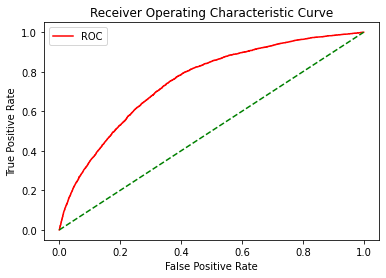

In [ ]:
fper, tper, thresholds = roc_curve(y_test, pred0[:,1])
print(roc_auc_score(y_test, pred0[:,1]))
plot_roc_curve(fper, tper)

純文字+answerer

In [ ]:
history = model_training(model, x_train, y_train_oh, x_valid, y_valid_oh, opt="rmsprop", epo=5)

Epoch 1/5
252/252 [==============================] - 9s 35ms/step - loss: 0.6264 - accuracy: 0.6976 - val_loss: 0.5945 - val_accuracy: 0.7066
Epoch 2/5
252/252 [==============================] - 9s 35ms/step - loss: 0.5827 - accuracy: 0.7114 - val_loss: 0.5926 - val_accuracy: 0.7042
Epoch 3/5
252/252 [==============================] - 9s 34ms/step - loss: 0.5643 - accuracy: 0.7218 - val_loss: 0.5989 - val_accuracy: 0.6971
Epoch 4/5
252/252 [==============================] - 9s 34ms/step - loss: 0.5446 - accuracy: 0.7342 - val_loss: 0.6054 - val_accuracy: 0.6884
Epoch 5/5
252/252 [==============================] - 8s 34ms/step - loss: 0.5219 - accuracy: 0.7486 - val_loss: 0.6083 - val_accuracy: 0.6995


In [ ]:
pred0 = model.predict(x_test) 
class0 = np.argmax(pred0, axis=1)
print("acc:",accuracy_score(y_test, class0))

acc: 0.6937009834432964


純文字+ans+answerer

In [ ]:
history = model_training(model, x_train, y_train_oh, x_valid, y_valid_oh, opt="rmsprop", epo=5)

Epoch 1/5
252/252 [==============================] - 9s 35ms/step - loss: 0.5653 - accuracy: 0.7208 - val_loss: 0.5195 - val_accuracy: 0.7406
Epoch 2/5
252/252 [==============================] - 8s 34ms/step - loss: 0.4994 - accuracy: 0.7548 - val_loss: 0.5323 - val_accuracy: 0.7182
Epoch 3/5
252/252 [==============================] - 8s 33ms/step - loss: 0.4814 - accuracy: 0.7681 - val_loss: 0.5436 - val_accuracy: 0.7359
Epoch 4/5
252/252 [==============================] - 8s 33ms/step - loss: 0.4610 - accuracy: 0.7827 - val_loss: 0.5149 - val_accuracy: 0.7465
Epoch 5/5
252/252 [==============================] - 8s 34ms/step - loss: 0.4389 - accuracy: 0.7980 - val_loss: 0.5165 - val_accuracy: 0.7439


In [ ]:
pred0 = model.predict(x_test) 
class0 = np.argmax(pred0, axis=1)
print("acc:",accuracy_score(y_test, class0))

acc: 0.7347815262044068


### 模型 2

In [ ]:
model1 = models.Sequential()
model1.add(layers.Embedding(WORDS_NUMBER, 8, input_length=MAX_LEN))
model1.add(layers.LSTM(15,dropout=0.5))
model1.add(layers.Dense(2,activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3033, 8)           80000     
                                                                 
 lstm (LSTM)                 (None, 15)                1440      
                                                                 
 dense_1 (Dense)             (None, 2)                 32        
                                                                 
Total params: 81,472
Trainable params: 81,472
Non-trainable params: 0
_________________________________________________________________


純文字

In [ ]:
lstm_history = model_training(model1, x_train, y_train_oh, x_valid, y_valid_oh, opt="rmsprop", epo=5)

Epoch 1/5
252/252 [==============================] - 53s 193ms/step - loss: 0.6038 - accuracy: 0.7051 - val_loss: 0.6053 - val_accuracy: 0.7066
Epoch 2/5
252/252 [==============================] - 47s 188ms/step - loss: 0.5939 - accuracy: 0.7065 - val_loss: 0.5932 - val_accuracy: 0.7073
Epoch 3/5
252/252 [==============================] - 49s 193ms/step - loss: 0.5885 - accuracy: 0.7077 - val_loss: 0.5969 - val_accuracy: 0.7050
Epoch 4/5
252/252 [==============================] - 52s 206ms/step - loss: 0.5851 - accuracy: 0.7103 - val_loss: 0.6132 - val_accuracy: 0.7075
Epoch 5/5
252/252 [==============================] - 48s 192ms/step - loss: 0.5822 - accuracy: 0.7116 - val_loss: 0.5942 - val_accuracy: 0.7052


In [ ]:
pred1 = model1.predict(x_test) 
class1 = np.argmax(pred1, axis=1)
print("acc:",accuracy_score(y_test, class1))

acc: 0.7023527947217727


純文字+ans

In [ ]:
lstm_history = model_training(model1, x_train, y_train_oh, x_valid, y_valid_oh, opt="rmsprop", epo=5)

Epoch 1/5
252/252 [==============================] - 54s 197ms/step - loss: 0.5915 - accuracy: 0.7068 - val_loss: 0.5694 - val_accuracy: 0.7131
Epoch 2/5
252/252 [==============================] - 49s 194ms/step - loss: 0.5656 - accuracy: 0.7178 - val_loss: 0.5789 - val_accuracy: 0.7136
Epoch 3/5
252/252 [==============================] - 49s 195ms/step - loss: 0.5557 - accuracy: 0.7230 - val_loss: 0.5720 - val_accuracy: 0.7198
Epoch 4/5
252/252 [==============================] - 49s 195ms/step - loss: 0.5467 - accuracy: 0.7293 - val_loss: 0.5596 - val_accuracy: 0.7155
Epoch 5/5
252/252 [==============================] - 49s 195ms/step - loss: 0.5422 - accuracy: 0.7312 - val_loss: 0.5702 - val_accuracy: 0.7200


In [ ]:
pred1 = model1.predict(x_test) 
class1 = np.argmax(pred1, axis=1)
print("acc:",accuracy_score(y_test, class1))

acc: 0.7223953140578265


0.711610305754967


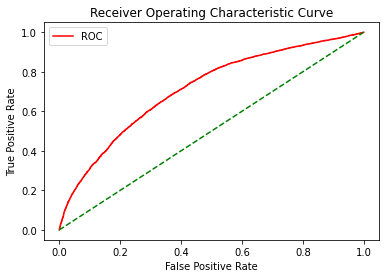

In [ ]:
fper, tper, thresholds = roc_curve(y_test, pred1[:,1])
print(roc_auc_score(y_test, pred1[:,1]))
plot_roc_curve(fper, tper)

純文字+answerer

In [ ]:
lstm_history = model_training(model1, x_train, y_train_oh, x_valid, y_valid_oh, opt="rmsprop", epo=5)

Epoch 1/5
252/252 [==============================] - 51s 197ms/step - loss: 0.6008 - accuracy: 0.7056 - val_loss: 0.5935 - val_accuracy: 0.7066
Epoch 2/5
252/252 [==============================] - 49s 194ms/step - loss: 0.5916 - accuracy: 0.7065 - val_loss: 0.6014 - val_accuracy: 0.7067
Epoch 3/5
252/252 [==============================] - 49s 195ms/step - loss: 0.5867 - accuracy: 0.7092 - val_loss: 0.5929 - val_accuracy: 0.7076
Epoch 4/5
252/252 [==============================] - 49s 194ms/step - loss: 0.5828 - accuracy: 0.7108 - val_loss: 0.6056 - val_accuracy: 0.7072
Epoch 5/5
252/252 [==============================] - 49s 194ms/step - loss: 0.5798 - accuracy: 0.7123 - val_loss: 0.5993 - val_accuracy: 0.7075


In [ ]:
pred1 = model1.predict(x_test) 
class1 = np.argmax(pred1, axis=1)
print("acc:",accuracy_score(y_test, class1))

acc: 0.7056516867919831


純文字+ans+answerer

In [ ]:
lstm_history = model_training(model1, x_train, y_train_oh, x_valid, y_valid_oh, opt="rmsprop", epo=5)

Epoch 1/5
252/252 [==============================] - 51s 197ms/step - loss: 0.5944 - accuracy: 0.7057 - val_loss: 0.5750 - val_accuracy: 0.7072
Epoch 2/5
252/252 [==============================] - 49s 195ms/step - loss: 0.5671 - accuracy: 0.7166 - val_loss: 0.5752 - val_accuracy: 0.7125
Epoch 3/5
252/252 [==============================] - 49s 195ms/step - loss: 0.5559 - accuracy: 0.7252 - val_loss: 0.5696 - val_accuracy: 0.7139
Epoch 4/5
252/252 [==============================] - 49s 196ms/step - loss: 0.5495 - accuracy: 0.7272 - val_loss: 0.5664 - val_accuracy: 0.7178
Epoch 5/5
252/252 [==============================] - 49s 195ms/step - loss: 0.5446 - accuracy: 0.7301 - val_loss: 0.5452 - val_accuracy: 0.7314


In [ ]:
pred1 = model1.predict(x_test) 
class1 = np.argmax(pred1, axis=1)
print("acc:",accuracy_score(y_test, class1))

acc: 0.7251338229802067


### 模型 3

In [ ]:
model2 = models.Sequential()
model2.add(layers.Embedding(WORDS_NUMBER, 40, input_length=MAX_LEN))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(2,activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 3033, 40)          400000    
                                                                 
 bidirectional (Bidirectiona  (None, 40)               9760      
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 2)                 82        
                                                                 
Total params: 409,842
Trainable params: 409,842
Non-trainable params: 0
_________________________________________________________________


純文字

In [ ]:
bi_lstm_history = model_training(model2, x_train, y_train_oh, x_valid, y_valid_oh, opt="rmsprop", epo=5)

Epoch 1/5
252/252 [==============================] - 116s 432ms/step - loss: 0.6005 - accuracy: 0.7051 - val_loss: 0.6003 - val_accuracy: 0.7065
Epoch 2/5
252/252 [==============================] - 109s 433ms/step - loss: 0.5899 - accuracy: 0.7074 - val_loss: 0.6015 - val_accuracy: 0.7073
Epoch 3/5
252/252 [==============================] - 107s 426ms/step - loss: 0.5841 - accuracy: 0.7103 - val_loss: 0.5969 - val_accuracy: 0.7031
Epoch 4/5
252/252 [==============================] - 108s 427ms/step - loss: 0.5795 - accuracy: 0.7130 - val_loss: 0.5967 - val_accuracy: 0.7003
Epoch 5/5
252/252 [==============================] - 107s 425ms/step - loss: 0.5768 - accuracy: 0.7145 - val_loss: 0.5980 - val_accuracy: 0.7028


In [ ]:
pred2 = model2.predict(x_test) 
class2 = np.argmax(pred2, axis=1)
print("acc:",accuracy_score(y_test, class2))

acc: 0.7007967135565791


純文字+ans

In [ ]:
bi_lstm_history = model_training(model2, x_train, y_train_oh, x_valid, y_valid_oh, opt="rmsprop", epo=5)

Epoch 1/5
252/252 [==============================] - 113s 435ms/step - loss: 0.5697 - accuracy: 0.7167 - val_loss: 0.5558 - val_accuracy: 0.7181
Epoch 2/5
252/252 [==============================] - 109s 432ms/step - loss: 0.5413 - accuracy: 0.7304 - val_loss: 0.5380 - val_accuracy: 0.7307
Epoch 3/5
252/252 [==============================] - 109s 432ms/step - loss: 0.5346 - accuracy: 0.7337 - val_loss: 0.5339 - val_accuracy: 0.7306
Epoch 4/5
252/252 [==============================] - 109s 432ms/step - loss: 0.5292 - accuracy: 0.7378 - val_loss: 0.5410 - val_accuracy: 0.7172
Epoch 5/5
252/252 [==============================] - 109s 431ms/step - loss: 0.5238 - accuracy: 0.7411 - val_loss: 0.5338 - val_accuracy: 0.7323


In [ ]:
pred2 = model2.predict(x_test) 
class2 = np.argmax(pred2, axis=1)
print("acc:",accuracy_score(y_test, class2))

acc: 0.7313060817547358


0.728119756248344


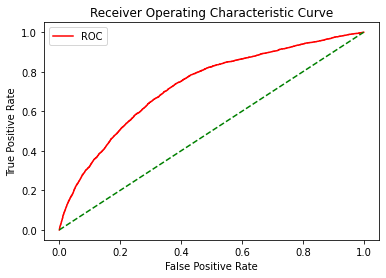

In [ ]:
fper, tper, thresholds = roc_curve(y_test, pred2[:,1])
print(roc_auc_score(y_test, pred2[:,1]))
plot_roc_curve(fper, tper)

純文字+answerer

In [ ]:
bi_lstm_history = model_training(model2, x_train, y_train_oh, x_valid, y_valid_oh, opt="rmsprop", epo=5)

Epoch 1/5
252/252 [==============================] - 112s 433ms/step - loss: 0.5974 - accuracy: 0.7046 - val_loss: 0.5912 - val_accuracy: 0.7064
Epoch 2/5
252/252 [==============================] - 108s 430ms/step - loss: 0.5858 - accuracy: 0.7083 - val_loss: 0.5893 - val_accuracy: 0.7075
Epoch 3/5
252/252 [==============================] - 108s 429ms/step - loss: 0.5789 - accuracy: 0.7118 - val_loss: 0.5900 - val_accuracy: 0.7039
Epoch 4/5
252/252 [==============================] - 108s 430ms/step - loss: 0.5741 - accuracy: 0.7141 - val_loss: 0.5928 - val_accuracy: 0.7067
Epoch 5/5
252/252 [==============================] - 108s 429ms/step - loss: 0.5710 - accuracy: 0.7145 - val_loss: 0.6000 - val_accuracy: 0.7080


In [ ]:
pred2 = model2.predict(x_test) 
class2 = np.argmax(pred2, axis=1)
print("acc:",accuracy_score(y_test, class2))

acc: 0.7057139300385908


純文字+ans+answerer

In [ ]:
bi_lstm_history = model_training(model2, x_train, y_train_oh, x_valid, y_valid_oh, opt="rmsprop", epo=5)

Epoch 1/5
252/252 [==============================] - 113s 437ms/step - loss: 0.5836 - accuracy: 0.7088 - val_loss: 0.5937 - val_accuracy: 0.7106
Epoch 2/5
252/252 [==============================] - 108s 430ms/step - loss: 0.5523 - accuracy: 0.7279 - val_loss: 0.5463 - val_accuracy: 0.7295
Epoch 3/5
252/252 [==============================] - 108s 430ms/step - loss: 0.5415 - accuracy: 0.7319 - val_loss: 0.5473 - val_accuracy: 0.7321
Epoch 4/5
252/252 [==============================] - 108s 430ms/step - loss: 0.5330 - accuracy: 0.7377 - val_loss: 0.5554 - val_accuracy: 0.7135
Epoch 5/5
252/252 [==============================] - 108s 430ms/step - loss: 0.5261 - accuracy: 0.7416 - val_loss: 0.5354 - val_accuracy: 0.7310


In [ ]:
pred2 = model2.predict(x_test) 
class2 = np.argmax(pred2, axis=1)
print("acc:",accuracy_score(y_test, class2))

acc: 0.7265654176521847


### 模型 4

In [ ]:
model3 = models.Sequential()
model3.add(layers.Embedding(WORDS_NUMBER, 40, input_length=MAX_LEN))
model3.add(layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
model3.add(layers.MaxPooling1D(3))
model3.add(layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
model3.add(layers.GlobalMaxPooling1D())
model3.add(layers.Dense(2,activation='softmax'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 3033, 40)          400000    
                                                                 
 conv1d (Conv1D)             (None, 3028, 20)          4820      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1009, 20)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1004, 20)          2420      
                                                                 
 global_max_pooling1d (Globa  (None, 20)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 2)                

純文字

In [ ]:
history3 = model_training(model3, x_train, y_train_oh, x_valid, y_valid_oh, opt="rmsprop", epo=5)

Epoch 1/5
252/252 [==============================] - 33s 97ms/step - loss: 0.7985 - accuracy: 0.7034 - val_loss: 0.6146 - val_accuracy: 0.7066
Epoch 2/5
252/252 [==============================] - 24s 97ms/step - loss: 0.6134 - accuracy: 0.7063 - val_loss: 0.6129 - val_accuracy: 0.7066
Epoch 3/5
252/252 [==============================] - 24s 96ms/step - loss: 0.6130 - accuracy: 0.7063 - val_loss: 0.6127 - val_accuracy: 0.7066
Epoch 4/5
252/252 [==============================] - 24s 96ms/step - loss: 0.6129 - accuracy: 0.7063 - val_loss: 0.6126 - val_accuracy: 0.7066
Epoch 5/5
252/252 [==============================] - 24s 96ms/step - loss: 0.6129 - accuracy: 0.7063 - val_loss: 0.6126 - val_accuracy: 0.7066


In [ ]:
pred3 = model3.predict(x_test) 
class3 = np.argmax(pred3, axis=1)
print("acc:",accuracy_score(y_test, class3))

acc: 0.7055272002987676


純文字+ans

In [ ]:
history3 = model_training(model3, x_train, y_train_oh, x_valid, y_valid_oh, opt="rmsprop", epo=5)

Epoch 1/5


KeyboardInterrupt: ignored

In [ ]:
pred3 = model3.predict(x_test) 
class3 = np.argmax(pred3, axis=1)
print("acc:",accuracy_score(y_test, class3))

純文字+answerer

In [ ]:
history3 = model_training(model3, x_train, y_train_oh, x_valid, y_valid_oh, opt="rmsprop", epo=5)

Epoch 1/5
252/252 [==============================] - 25s 97ms/step - loss: 0.8016 - accuracy: 0.7024 - val_loss: 0.6167 - val_accuracy: 0.7066
Epoch 2/5
252/252 [==============================] - 24s 96ms/step - loss: 0.6140 - accuracy: 0.7063 - val_loss: 0.6128 - val_accuracy: 0.7066
Epoch 3/5
252/252 [==============================] - 24s 96ms/step - loss: 0.6129 - accuracy: 0.7063 - val_loss: 0.6128 - val_accuracy: 0.7066
Epoch 4/5
252/252 [==============================] - 24s 96ms/step - loss: 0.6130 - accuracy: 0.7063 - val_loss: 0.6127 - val_accuracy: 0.7066
Epoch 5/5
252/252 [==============================] - 24s 96ms/step - loss: 0.6129 - accuracy: 0.7063 - val_loss: 0.6127 - val_accuracy: 0.7066


In [ ]:
pred3 = model3.predict(x_test) 
class3 = np.argmax(pred3, axis=1)
print("acc:",accuracy_score(y_test, class3))

acc: 0.7055272002987676


純文字+ans+answerer

In [ ]:
history3 = model_training(model3, x_train, y_train_oh, x_valid, y_valid_oh, opt="rmsprop", epo=5)

Epoch 1/5
252/252 [==============================] - 26s 98ms/step - loss: 0.7883 - accuracy: 0.7046 - val_loss: 0.5808 - val_accuracy: 0.7066
Epoch 2/5
252/252 [==============================] - 24s 96ms/step - loss: 0.5625 - accuracy: 0.7252 - val_loss: 0.5562 - val_accuracy: 0.7327
Epoch 3/5
252/252 [==============================] - 24s 96ms/step - loss: 0.5468 - accuracy: 0.7444 - val_loss: 0.5519 - val_accuracy: 0.7389
Epoch 4/5
252/252 [==============================] - 24s 96ms/step - loss: 0.5408 - accuracy: 0.7485 - val_loss: 0.5399 - val_accuracy: 0.7460
Epoch 5/5
252/252 [==============================] - 24s 96ms/step - loss: 0.5371 - accuracy: 0.7529 - val_loss: 0.5494 - val_accuracy: 0.7404


In [ ]:
pred3 = model3.predict(x_test) 
class3 = np.argmax(pred3, axis=1)
print("acc:",accuracy_score(y_test, class3))

acc: 0.7398232291796341
